## Studies the ratios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import astropy.wcs as wcs

import sys
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import astropy.wcs as wcs

import sys

import os

# CAN ALSO WORK WITH PYPATH
sys.path.insert(0,'libraries/')
import ratio_density as rat

import os

# CAN ALSO WORK WITH PYPATH
sys.path.insert(0,'libraries/')
import ratio_density as rat
from image import Astro_Image

In [2]:
## input ##

## for the fits files to open
file_name_1 = 'Ipeak_4sigmaMusca_C18O21_TP_kelvin_Smto10'
#file_name_1 = 'Ipeak_4sigmaMusca_C18O21_TP.im.spwcut.smo.rep.kelvin'
path_1 = '../data/ALMA/fitting_results/'
label_1 = 'C$^{18}$O(2-1)'
cal_unc_1 = 0.1 ## 10%

file_name_2 = 'Ipeak_4sigmaMusca_C18O10_TP_kelvin'
#file_name_2 = 'Ipeak_4sigmaMusca_C18O10_TP.im.spwcut.kelvin'
path_2 = '../data/ALMA/fitting_results/'
label_2 = 'C$^{18}$O(1-0)'
cal_unc_2 = 0.1 ## 10%

file_name_cont = 'musca_coldens_high250_clean_2d'
path_cont = '../data/Herschel/'
label_cont = 'N$_{H_{2}}$ (cm$^{-2}$)'

## contour information
levs_cont = [2.0e21 + i*1.0e21 for i in range(0,6)]
wids_cont = [0.7 for lev in levs_cont]

## plotting information for the ratio map
max_ratio = 1.1 ## Set to None if you do not want to use it
label_map = 'T$_{C^{18}O(2-1)}$/T$_{C^{18}O(1-0)}$'
x1_pl = 60.
x2_pl = 300.
y1_pl = 25.
y2_pl = 345.

## information for the density calculation (fixed mol. col. density, linewidth and kinetic temperature)
mol = 'c18o'
line_1 = '2-1'
line_2 = '1-0'
mol_col_dens = '4e+14'
t_kin = '10'
fwhm = '0p25'
fit_order = 4 ## order of the polynomial that will be fitted
min_dens = 1e3
max_dens = 1e4
label_density = "n$_{H_{2}}$ (cm$^{-3}$)"

#### information to save results ####
path_save_ratio_fits = '../data/results/'
path_save_ratio = '../plots/ALMA_c18o21-10_ratio/'

## for my smoothed data
name_save_ratio = 'ratio_Ipeak_C18O21-C18O10_4sigma'
path_ratio_map_fig = path_save_ratio+name_save_ratio+'.pdf'

path_density_map_fig = path_save_ratio+'density_map_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'.pdf'
path_density_hist_fig = path_save_ratio+'density_histogram_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'.pdf'
path_dens_ratio_curve_fig = path_save_ratio+'ratio_vs_density_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'+fit.pdf'
name_density_fits = 'density_map_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'.fits'

## for the smoothed data from Doris
#name_save_ratio = 'ratio_Ipeak_C18O21-C18O10_4sigma_Doris'
#path_ratio_map_fig = path_save_ratio+name_save_ratio+'.pdf'

#path_density_map_fig = path_save_ratio+'density_map_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'_Doris.pdf'
#path_density_hist_fig = path_save_ratio+'density_histogram_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'_Doris.pdf'
#path_dens_ratio_curve_fig = path_save_ratio+'ratio_vs_density_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'+fit_Doris.pdf'
#name_density_fits = 'density_map_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'_Doris.fits'

## information to map density with constraints from Herschel
file_name_colDens = 'musca_coldens_high250_clean_2d'
path_colDens = '../data/Herschel/'
label_colDens = 'N$_{H_{2}}$ (cm$^{-2}$)'

file_name_dustT = 'musca_temp_r500_clean'
path_dustT = '../data/Herschel/'
label_dustT = 'T (K)'

In [3]:
## open the fits files
hdu = pyfits.open(path_1 + file_name_1 + '.fits')
hdu.info()
data_1 = hdu[0].data
header_1 = hdu[0].header
w_1 = wcs.WCS(header_1)
#cal_unc_1 = np.zeros((len(data_1),len(data_1[0])),dtype=float)
#cal_unc_1[cal_unc_1 == 0.] = 0.06

hdu = pyfits.open(path_2 + file_name_2 + '.fits')
hdu.info()
data_2 = hdu[0].data
header_2 = hdu[0].header
w_2 = wcs.WCS(header_2)
#cal_unc_2 = np.zeros((len(data_2),len(data_2[0])),dtype=float)
#cal_unc_2[cal_unc_2 == 0.] = 0.06

hdu_3 = pyfits.open(path_cont + file_name_cont + '.fits')
hdu_3.info()
#data_cont = hdu[0].data
#header_cont = hdu[0].header
#w_cont = wcs.WCS(header_cont)

Filename: ../data/ALMA/fitting_results/Ipeak_4sigmaMusca_C18O21_TP_kelvin_Smto10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     101   (360, 385)   float64   
Filename: ../data/ALMA/fitting_results/Ipeak_4sigmaMusca_C18O10_TP_kelvin.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      79   (360, 385)   float64   
Filename: ../data/Herschel/musca_coldens_high250_clean_2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (2800, 3800)   float32   


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
## calculate the ratio map
map_ratio = rat.ratio_map(data_1, data_2, header_1, rel_uncs = [cal_unc_1, cal_unc_2])
#map_ratio = rat.ratio_map(data_1, data_2, header_1)

In [5]:
## save as fits file
map_ratio.save_fits(path_save_ratio_fits, name_save_ratio)

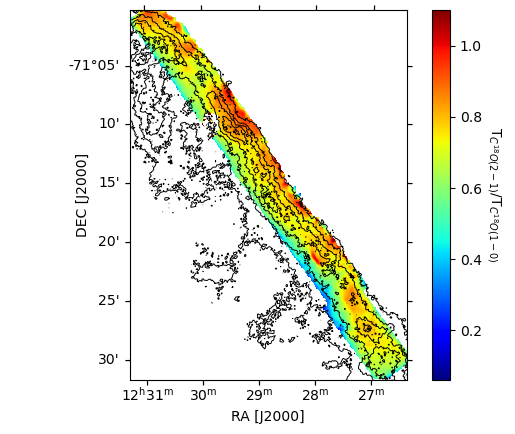

In [6]:
## plot the ratio map
map_ratio.plot_image(label_map, max_val=max_ratio, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont, save_path = path_ratio_map_fig)

In [7]:
## plot the uncertainty map of the ratio
#unc_image = Astro_Image(map_ratio.rat_unc, header_1)
#unc_image.plot_image("uncertainty "+ label_map, max_val=max_ratio*0.15, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)

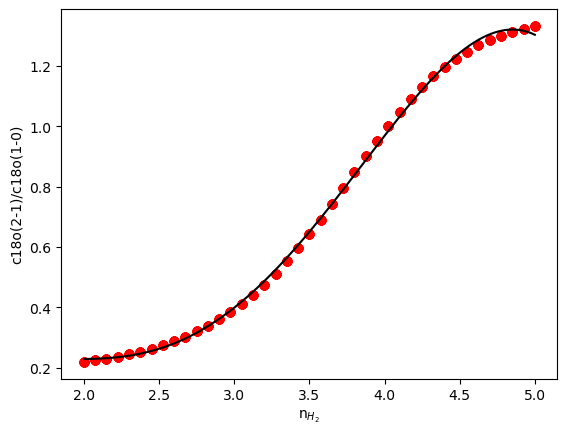

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


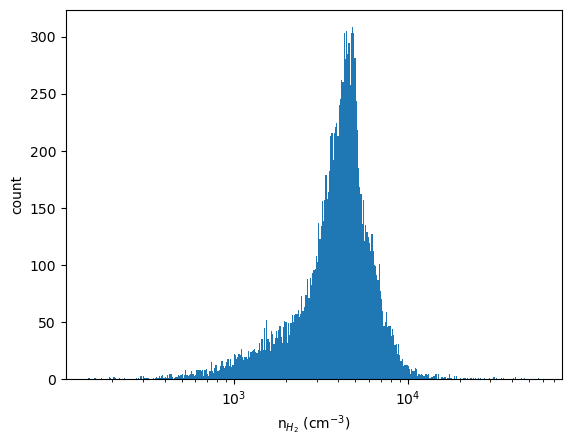

In [8]:
## derive density for given temperature and column density
image_density, image_density_low, image_density_up = map_ratio.get_density_ratio_single_temperature(mol, line_1, line_2, mol_col_dens, t_kin, fwhm, poly_order = fit_order, log_bool = False, save_path_hist = path_density_hist_fig, save_path_ratio = path_dens_ratio_curve_fig)

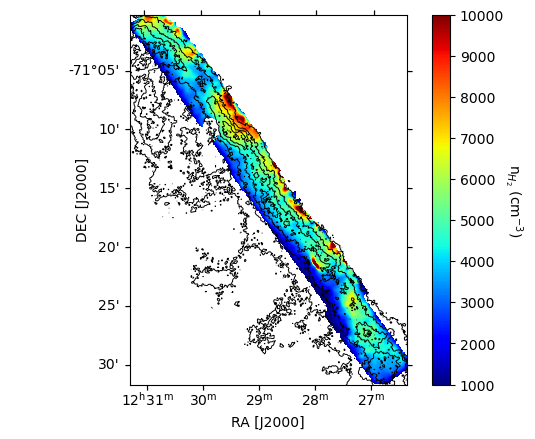

In [9]:
## plot the density map with the contours
image_density.plot_image(label_density, min_val = min_dens, max_val = max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont, save_path = path_density_map_fig)

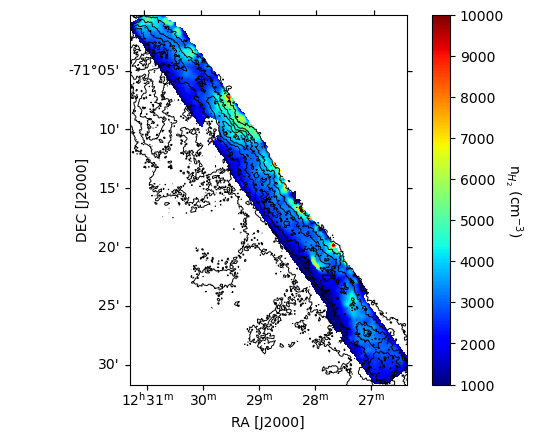

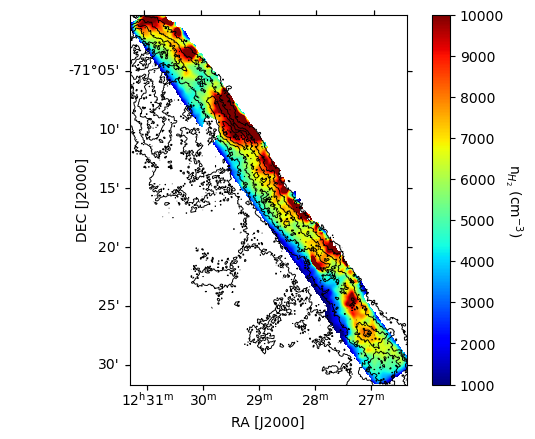

In [10]:
## plot the density map with the contours
image_density_low.plot_image(label_density, min_val = min_dens, max_val = max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)

image_density_up.plot_image(label_density, min_val = min_dens, max_val = max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)

In [11]:
## save the density map to a fits format
image_density.save_fits(path_save_ratio_fits, name_density_fits, BUNIT_label = label_density)

## Analyze the uncertainties

In [12]:
## calculate the upper and lower uncertainty value (note that the errorbars are necessarily symmetric)
low_err = (image_density.astro_image - image_density_low.astro_image)
up_err = (image_density_up.astro_image - image_density.astro_image)

## combine the upper and lower uncertainty value into an estimate for a single uncertainty value and relative uncertainty
av_err = np.nanmean(np.array([low_err, up_err]), axis = 0)
perc_err = 100.*av_err/image_density.astro_image

## store the uncertainties as an image
im_low_err = Astro_Image(low_err, image_density_low.header)
im_up_err = Astro_Image(up_err, image_density_up.header)
im_av_err = Astro_Image(av_err, image_density_up.header)
im_perc_err = Astro_Image(perc_err, image_density_up.header)

/var/folders/pb/xs3f5mtd5bq7lmrql1dj8p040000gn/T/ipykernel_21583/524727884.py:6: RuntimeWarning: Mean of empty slice
  av_err = np.nanmean(np.array([low_err, up_err]), axis = 0)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


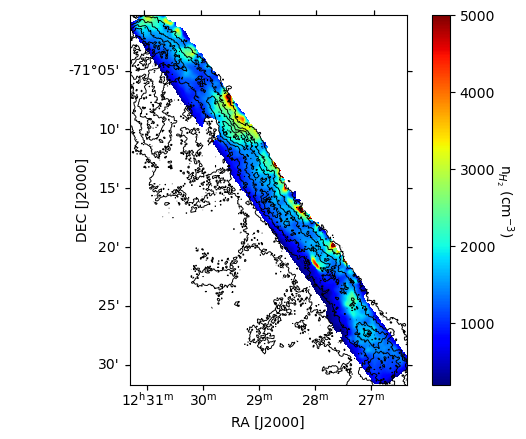

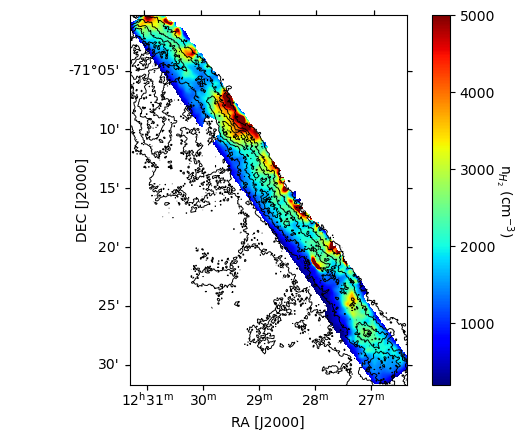

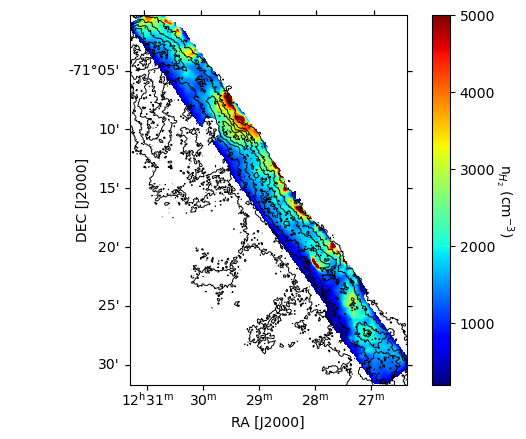

In [13]:
im_low_err.plot_image(label_density, min_val = 0.2*min_dens, max_val = 0.5*max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)
im_up_err.plot_image(label_density, min_val = 0.2*min_dens, max_val = 0.5*max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)
im_av_err.plot_image(label_density, min_val = 0.2*min_dens, max_val = 0.5*max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)

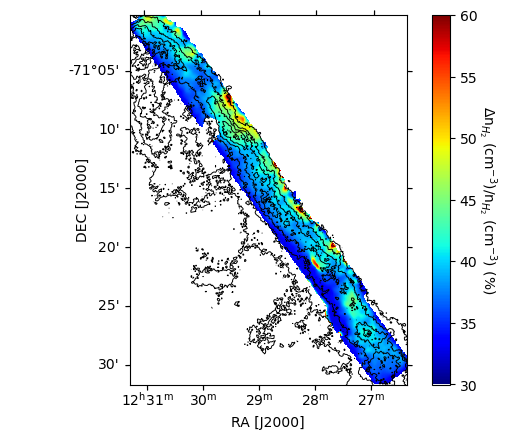

In [14]:
im_perc_err.plot_image(r'$\Delta$'+label_density+'/'+label_density+' (%)', min_val = 30., max_val = 60., contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)